Welcome. This notebook can be used to try out the service from Stability, and may also be used to straight copy the code for your production environment if you are developing an application using our API.

New to colab? Just hit the play button on each of the cells and follow instructions.

You will need an account on https://platform.stability.ai/ to use the features.

Have fun and do great things.

In [1]:
#@title Install requirements
from io import BytesIO
import IPython
import json
import os
from PIL import Image
import requests
import time
from google.colab import output

In [2]:
#@title Connect to the Stability API

import getpass
# @markdown To get your API key visit https://platform.stability.ai/account/keys
STABILITY_KEY = getpass.getpass('Enter your API Key')



Enter your API Key··········


In [3]:
#@title Define functions

def send_generation_request(
    host,
    params,
):
    headers = {
        "Accept": "image/*",
        "Authorization": f"Bearer {STABILITY_KEY}"
    }

    # Encode parameters
    files = {}
    image = params.pop("image", None)
    mask = params.pop("mask", None)
    if image is not None and image != '':
        files["image"] = open(image, 'rb')
    if mask is not None and mask != '':
        files["mask"] = open(mask, 'rb')
    if len(files)==0:
        files["none"] = ''

    # Send request
    print(f"Sending REST request to {host}...")
    response = requests.post(
        host,
        headers=headers,
        files=files,
        data=params
    )
    if not response.ok:
        raise Exception(f"HTTP {response.status_code}: {response.text}")

    return response

# Control

Stable Image editing services include four offerings currently in production:

- Sketch: This service offers an ideal solution for design projects that require brainstorming and frequent iterations. It upgrades rough hand-drawn sketches to refined outputs with precise control. For non-sketch images, it allows detailed manipulation of the final appearance by leveraging the contour lines and edges within the image. This service will use 3 credits.
- Control: This service excels in generating images by maintaining the structure of an input image, making it especially valuable for advanced content creation scenarios such as recreating scenes or rendering characters from models. This service will use 3 credits.

See https://platform.stability.ai/docs/api-reference#tag/Control

Try these services out in the sections below. Check back in for regular updates.

Feedback welcome.

Sending REST request to https://api.stability.ai/v2beta/stable-image/control/sketch...
Saved image edited_sketch_3677331323.webp


<IPython.core.display.Javascript object>

Original image:


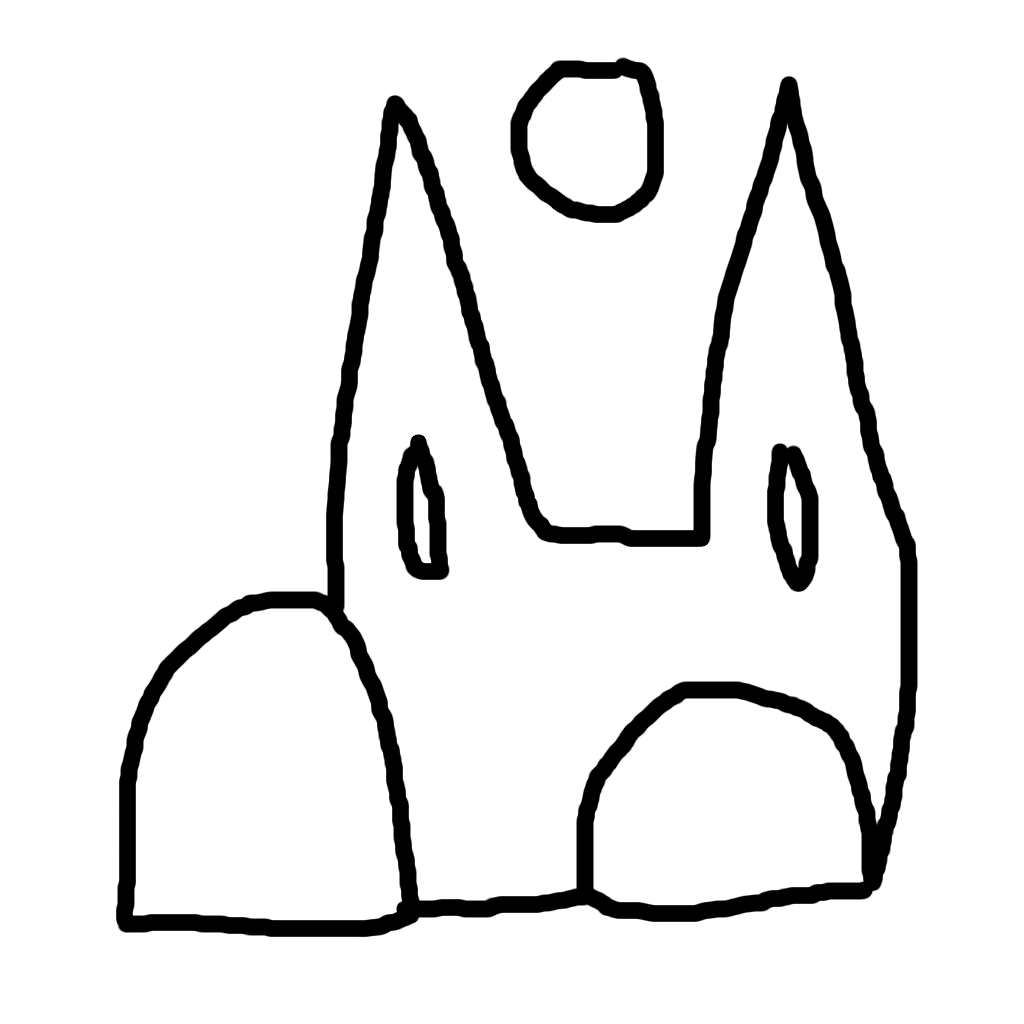

Result image:


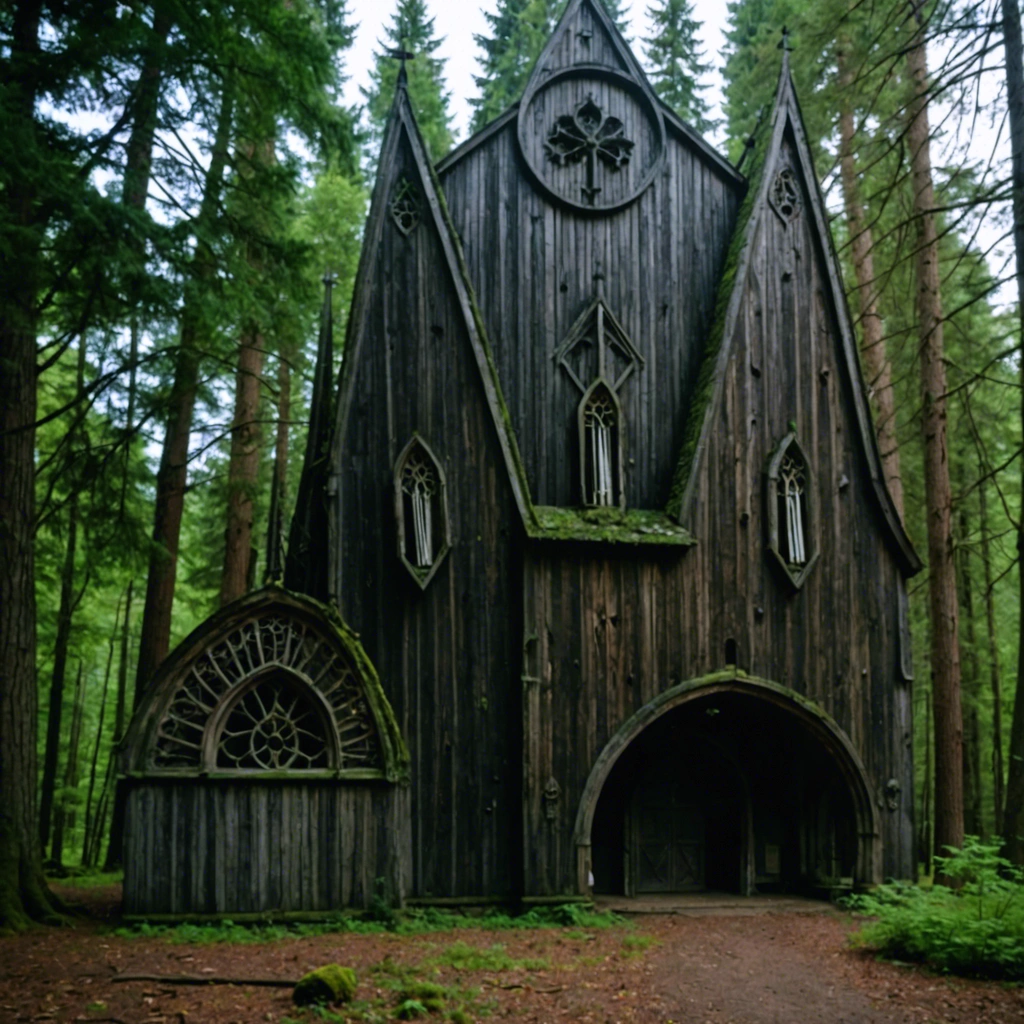

In [13]:
#@title Sketch

#@markdown - Drag and drop image to file folder on left
#@markdown - Right click it and choose Copy path
#@markdown - Paste that path into image field below
#@markdown <br><br>

image = "/content/sketch.png" #@param {type:"string"}
prompt = "a creepy wooden cathedral in the forest" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
control_strength = 0.7  #@param {type:"slider", min:0, max:1, step:0.05}
seed = 0 #@param {type:"integer"}
output_format = "webp" #@param ["webp", "jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/control/sketch"

params = {
    "control_strength" : control_strength,
    "image" : image,
    "seed" : seed,
    "output_format": output_format,
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
filename, _ = os.path.splitext(os.path.basename(image))
edited = f"edited_{filename}_{seed}.{output_format}"
with open(edited, "wb") as f:
    f.write(output_image)
print(f"Saved image {edited}")

output.no_vertical_scroll()
print("Original image:")
IPython.display.display(Image.open(image))
print("Result image:")
IPython.display.display(Image.open(edited))

Sending REST request to https://api.stability.ai/v2beta/stable-image/control/sketch...
Saved image edited_toad_665711615.webp


<IPython.core.display.Javascript object>

Original image:


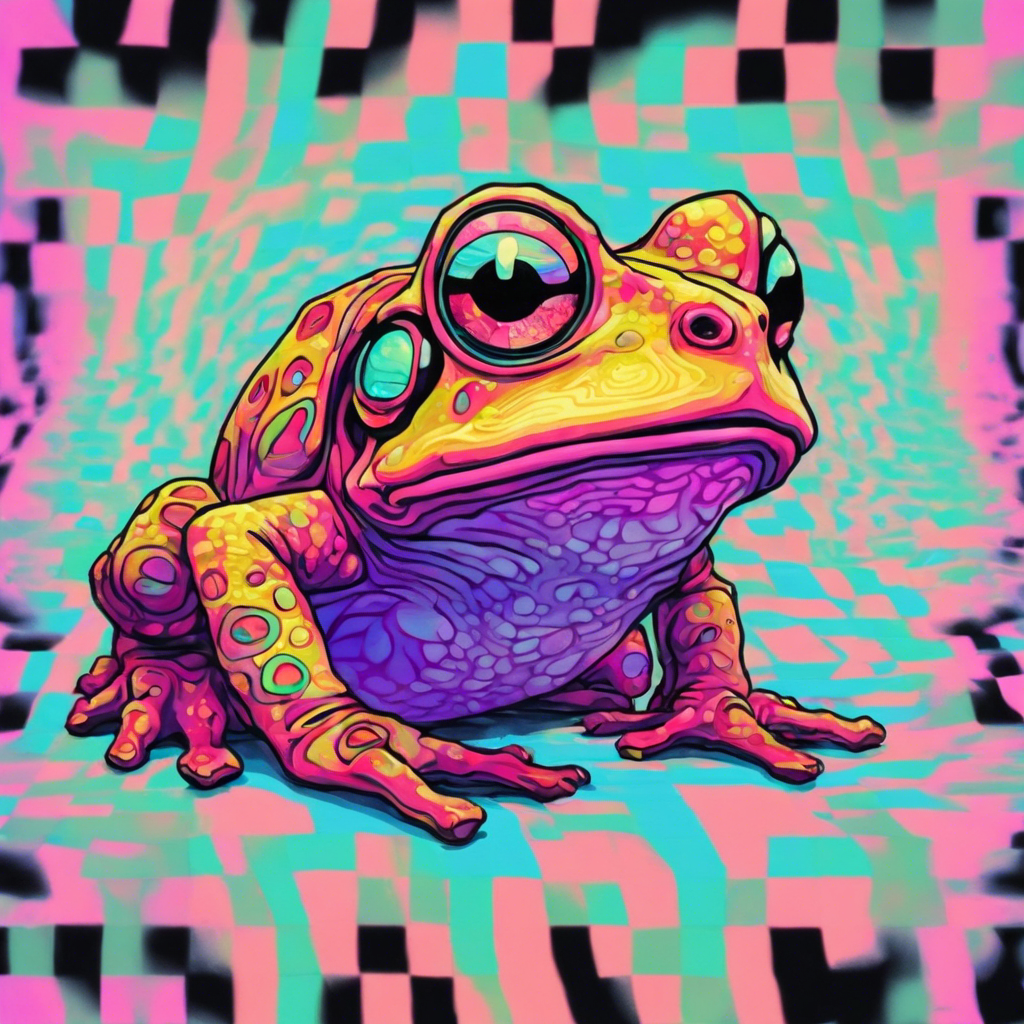

Result image:


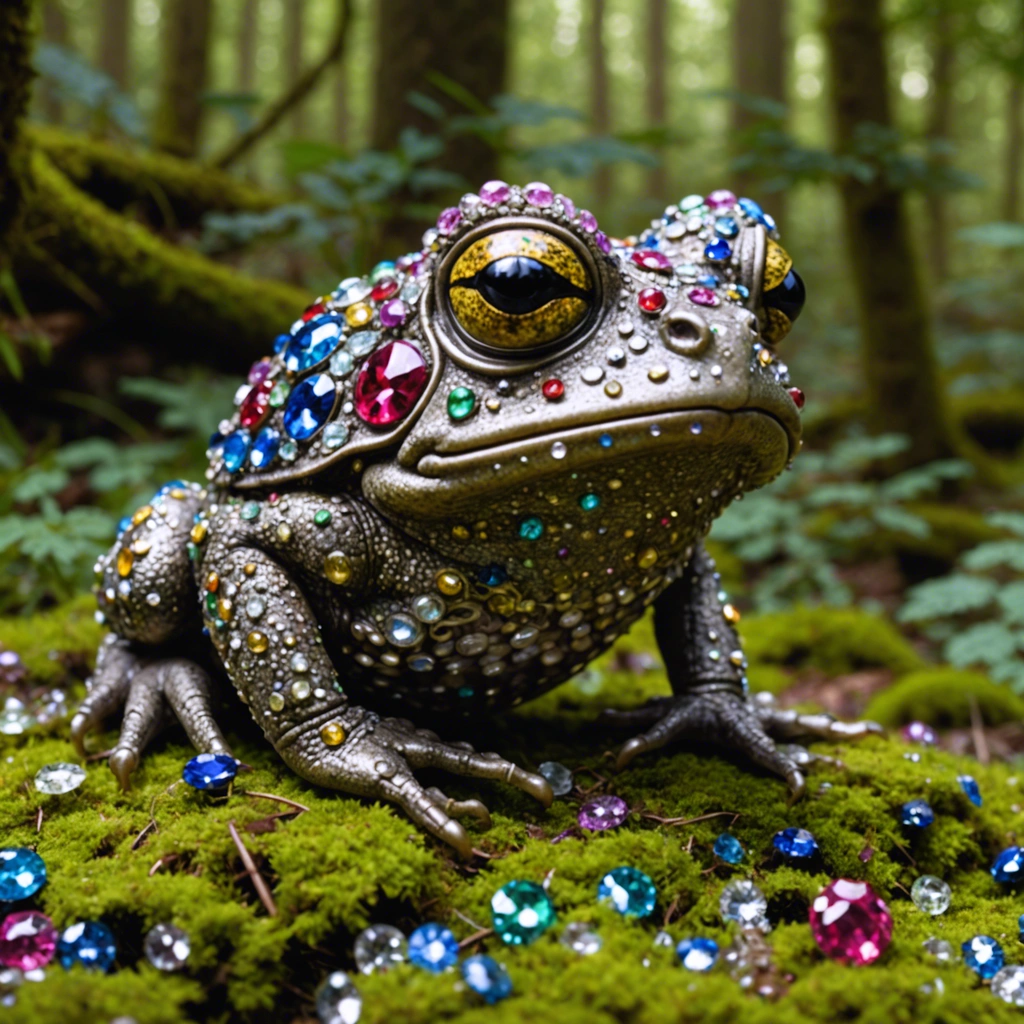

In [6]:
#@title Structure

#@markdown - Drag and drop image to file folder on left
#@markdown - Right click it and choose Copy path
#@markdown - Paste that path into image field below
#@markdown <br><br>

image = "/content/toad.png" #@param {type:"string"}
prompt = "a victorian toad covered in gems standing in the forest, looking at the viewer" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
control_strength = 0.7  #@param {type:"slider", min:0, max:1, step:0.05}
seed = 0 #@param {type:"integer"}
output_format = "webp" #@param ["webp", "jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/control/sketch"

params = {
    "control_strength" : control_strength,
    "image" : image,
    "seed" : seed,
    "output_format": output_format,
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
filename, _ = os.path.splitext(os.path.basename(image))
edited = f"edited_{filename}_{seed}.{output_format}"
with open(edited, "wb") as f:
    f.write(output_image)
print(f"Saved image {edited}")

output.no_vertical_scroll()
print("Original image:")
IPython.display.display(Image.open(image))
print("Result image:")
IPython.display.display(Image.open(edited))